# Spatial analysis with colab

**Objective**:  conduct spatial analysis and maps

Case Study: 2016 Voting in Wisconsin 
(adapted from https://datascience.quantecon.org/applications/maps.html)

In [1]:
# Install packages to colab environment 
!sudo apt-get update && apt-get install -y libspatialindex-dev
!pip install rtree
!pip install geopandas

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:12 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Hit:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspa

In [2]:
#import spatial analytics library

import pandas as pd  
import geopandas as gpd  # combines the capabilities of pandas and shapely for geospatial operations
from shapely.geometry import Point, Polygon, MultiPolygon  # for manipulating text data into geospatial shapes
from shapely import wkt  # stands for "well known text," allows for interchange across GIS programs
import rtree  # supports geospatial join

pd.set_option('display.max_columns', None)  # visualize all columns in dataframe

import warnings 
warnings.filterwarnings('ignore')


An organization called Natural Earth compiled the map data that we use here.

The file provides the outlines of countries, geopandas already comes bundled with this data.

In [3]:
# Grab low resolution world file
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


world is a GeoDataFrame with the following columns:

--pop_est: Contains a population estimate for the country

--continent: The country’s continent

--name: The country’s name

--iso_a3: The country’s 3 letter abbreviation

--gdp_md_est: An estimate of country’s GDP

--geometry: A POLYGON for each country

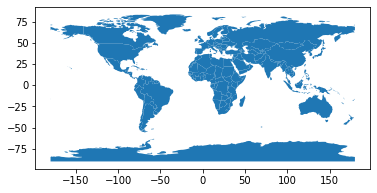

In [4]:
#show the map
world.plot()

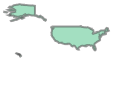

In [5]:
##show the geometry of USA
world.loc["USA", 'geometry']

In [6]:
state_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")
state_df.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,01,01779775,0400000US01,01,AL,Alabama,00,131173688951,4593686489,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
1,02,01785533,0400000US02,02,AK,Alaska,00,1477946266785,245390495931,"MULTIPOLYGON (((-133.65582 55.62562, -133.6249..."
2,04,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."
3,08,01779779,0400000US08,08,CO,Colorado,00,268429343790,1175112870,"POLYGON ((-109.06025 38.59933, -109.05954 38.7..."
4,09,01779780,0400000US09,09,CT,Connecticut,00,12542638347,1815476291,"POLYGON ((-73.72777 41.10070, -73.69595 41.115..."


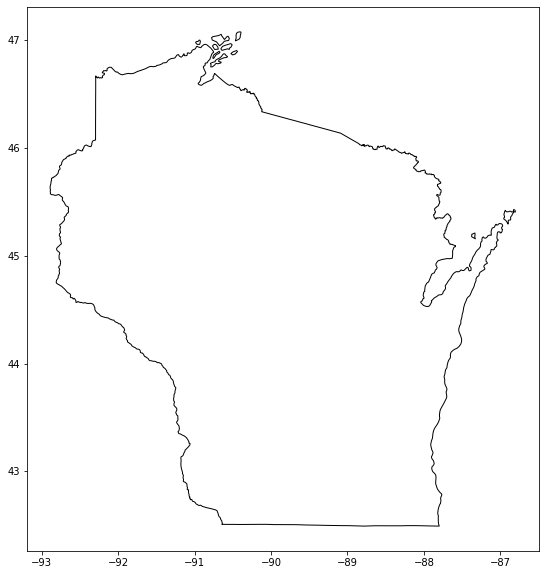

In [7]:
import matplotlib.pyplot as plt
fig, gax = plt.subplots(figsize=(10, 10))
#state_df.query("NAME == 'Illinois'").plot(ax=gax, edgecolor="black", color="white")
state_df.query("NAME == 'Wisconsin'").plot(ax=gax, edgecolor="black", color="white")
plt.show()

In [8]:
county_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_county_5m.zip")
county_df.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,04,015,00025445,0500000US04015,04015,Mohave,06,34475567011,387344307,"POLYGON ((-114.75562 36.08717, -114.75364 36.0..."
1,12,035,00308547,0500000US12035,12035,Flagler,06,1257365642,221047161,"POLYGON ((-81.52366 29.62243, -81.32406 29.625..."
2,20,129,00485135,0500000US20129,20129,Morton,06,1889993251,507796,"POLYGON ((-102.04195 37.02474, -102.04195 37.0..."
3,28,093,00695770,0500000US28093,28093,Marshall,06,1828989833,9195190,"POLYGON ((-89.72432 34.99521, -89.64428 34.995..."
4,29,510,00767557,0500000US29510,29510,St. Louis,25,160458044,10670040,"POLYGON ((-90.31821 38.60002, -90.30183 38.655..."


In [9]:
#county_df = county_df.query("STATEFP == '17'")
county_df = county_df.query("STATEFP == '55'")

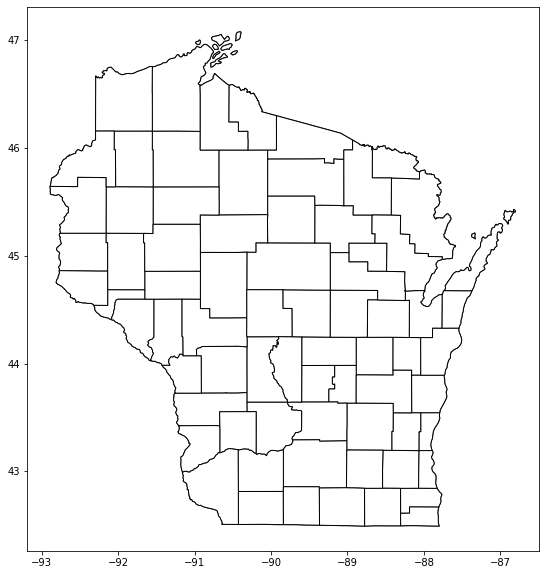

In [10]:
#county_df.plot()

fig, gax = plt.subplots(figsize=(10, 10))

#state_df.query("NAME == 'Illinois'").plot(ax=gax, edgecolor="black", color="white")
state_df.query("NAME == 'Wisconsin'").plot(ax=gax, edgecolor="black", color="white")



county_df.plot(ax=gax, edgecolor="black", color="white")

plt.show()


In [11]:
results = pd.read_csv("https://datascience.quantecon.org/assets/data/ruhl_cleaned_results.csv", thousands=",")
results.head()

,county,total,trump,clinton
0,ADAMS,10130,5966,3745
1,ASHLAND,8032,3303,4226
2,BARRON,22671,13614,7889
3,BAYFIELD,9612,4124,4953
4,BROWN,129011,67210,53382


In [12]:
results["county"] = results["county"].str.title()
results["county"] = results["county"].str.strip()
county_df["NAME"] = county_df["NAME"].str.title()
county_df["NAME"] = county_df["NAME"].str.strip()

In [13]:
res_states = county_df.merge(results, left_on="NAME", right_on="county", how="inner")

In [14]:
res_states.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,county,total,trump,clinton
0,55,035,01581077,0500000US55035,55035,Eau Claire,06,1652211310,18848512,"POLYGON ((-91.65045 44.85595, -90.92225 44.857...",Eau Claire,55025,23331,27340
1,55,113,01581116,0500000US55113,55113,Sawyer,06,3256410077,240690443,"POLYGON ((-91.55128 46.15704, -91.23838 46.157...",Sawyer,9137,5185,3503
2,55,101,01581111,0500000US55101,55101,Racine,06,861267826,1190381762,"POLYGON ((-88.30638 42.84210, -88.06992 42.843...",Racine,94302,46681,42641
3,55,097,01581109,0500000US55097,55097,Portage,06,2074100548,56938133,"POLYGON ((-89.84493 44.68494, -89.34592 44.681...",Portage,38589,17305,18529
4,55,135,01581127,0500000US55135,55135,Waupaca,06,1936525696,45266211,"POLYGON ((-89.22374 44.68136, -88.60516 44.678...",Waupaca,26095,16209,8451


In [15]:
%%time
res_states["trump_share"] = res_states["trump"] / (res_states["total"])
res_states["rel_trump_share"] = res_states["trump"] / (res_states["trump"]+res_states["clinton"])
res_states.head()

CPU times: user 6.96 ms, sys: 232 µs, total: 7.2 ms
Wall time: 7.28 ms


### show the vote map

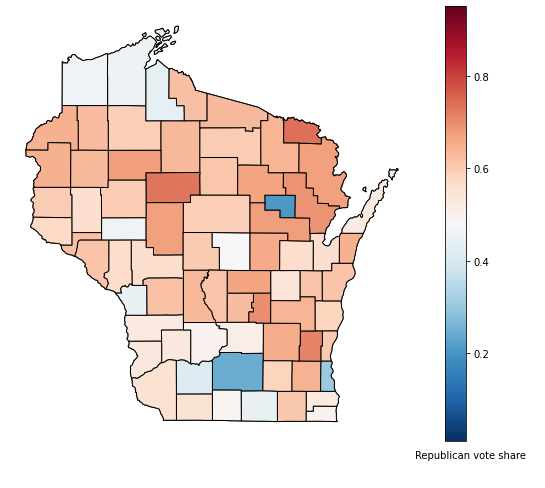

In [16]:
fig, gax = plt.subplots(figsize = (10,8))

# Plot the state
#state_df[state_df['NAME'] == 'Illinois'].plot(ax = gax, edgecolor='black',color='white')
state_df[state_df['NAME'] == 'Wisconsin'].plot(ax = gax, edgecolor='black',color='white')
# Plot the counties and pass 'rel_trump_share' as the data to color
res_states.plot(
    ax=gax, edgecolor='black', column='rel_trump_share', legend=True, cmap='RdBu_r',
    vmin=0.01, vmax=0.95
)

# Add text to let people know what we are plotting
gax.annotate('Republican vote share',xy=(0.76, 0.06),  xycoords='figure fraction')

# No axis with long and lat
plt.axis('off')

plt.show()

### Who wins? How many counties did Trump win? How many did Clinton win?

In [17]:
res_states.eval("trump > clinton").sum()

60

In [18]:
res_states.eval("clinton>trump").sum()

12

### Who had more votes? 

In [19]:
res_states["trump"].sum()

1405284

In [20]:
res_states["clinton"].sum()

1382536